<a href="https://colab.research.google.com/github/jinay780/Datascience-projects/blob/master/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.drop(['CustomerID'],axis=1,inplace=True)

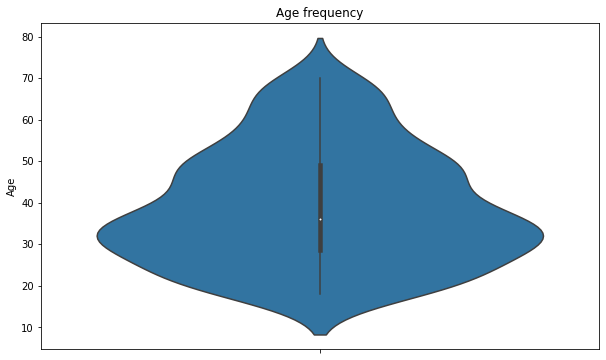

In [7]:
plt.figure(figsize=(10,6))
plt.title('Age frequency')
sns.violinplot(y=data['Age'])
plt.show()

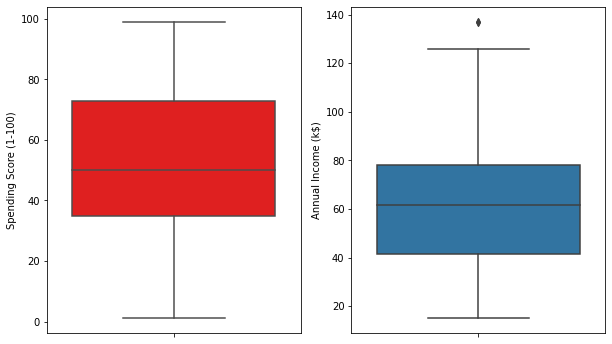

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["Annual Income (k$)"])
plt.show()

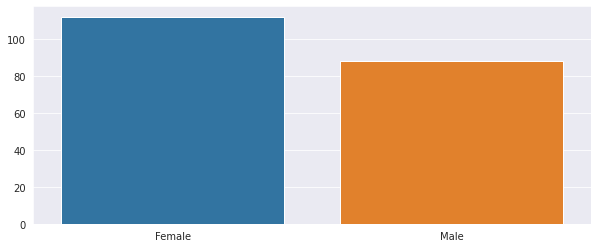

In [9]:
gender=data['Gender'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index, y=gender.values)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Gender']=label.fit_transform(data['Gender'])

In [11]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [12]:
x=data.drop(['Annual Income (k$)','Spending Score (1-100)'],axis=1)
y=data['Spending Score (1-100)']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [14]:
from sklearn.cluster import KMeans
model4=KMeans(n_clusters=2,random_state=0).fit(x_train,y_train)

In [15]:
pred2=model4.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse=mean_squared_error(y_test,pred2)

In [18]:
print('RMSE',np.sqrt(mse))

RMSE 54.69792043578988
